<a href="https://colab.research.google.com/github/himanshuarora1703/Tutorial-notebooks/blob/main/Feature%20Scaling/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [7]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [8]:
# check for misssing values

df.isna().sum()

Class label    0
Alcohol        0
Malic acid     0
dtype: int64

In [10]:
# make x and y

X = df.drop(columns=['Class label'])
y = df['Class label']

In [11]:
# Do train test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


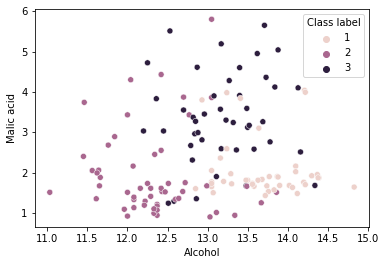

In [12]:
# plot the points on the graph

sns.scatterplot(X_train.iloc[:,0],X_train.iloc[:,1],hue=y_train)

In [13]:
# Do the scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [15]:
display(X_train.describe().loc[['min','max']])
print('min of scaler',sc.data_min_)
print('max of scaler',sc.data_max_)
print('The min of scaled values is',(np.min(X_train_scaled,axis=0)))
print('the max of the scaled values is',np.max(X_train_scaled,axis=0))

,Alcohol,Malic acid
min,11.03,0.9
max,14.83,5.8


min of scaler [11.03  0.9 ]
max of scaler [14.83  5.8 ]
The min of scaled values is [0. 0.]
the max of the scaled values is [1. 1.]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'After Scaling')

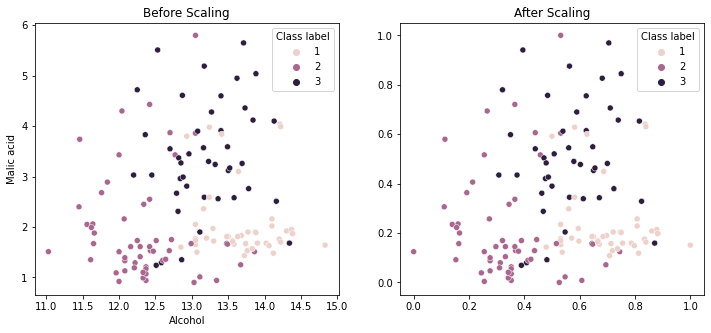

In [16]:
# plot the points on the graph
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(X_train.iloc[:,0],X_train.iloc[:,1],hue=y_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.scatterplot(X_train_scaled[:,0],X_train_scaled[:,1],hue=y_train)
plt.title('After Scaling')

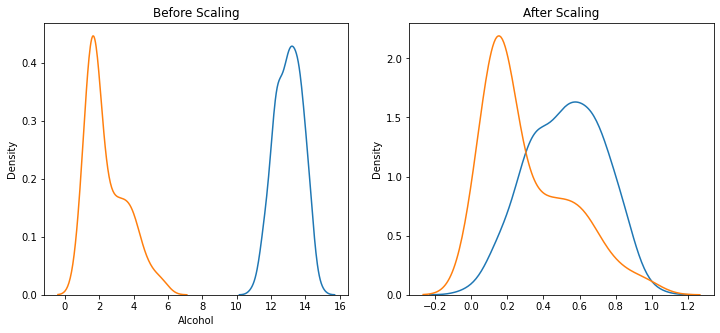

In [17]:
# view the distribution of the graphs

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train.iloc[:,0],ax=ax1)
sns.kdeplot(X_train.iloc[:,1],ax=ax1)


# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled[:,0],ax=ax2)
sns.kdeplot(X_train_scaled[:,1],ax=ax2)

Both the columns are now in the same scale and the effect of the units is now gone.

Text(0.5, 1.0, 'After Scaling')

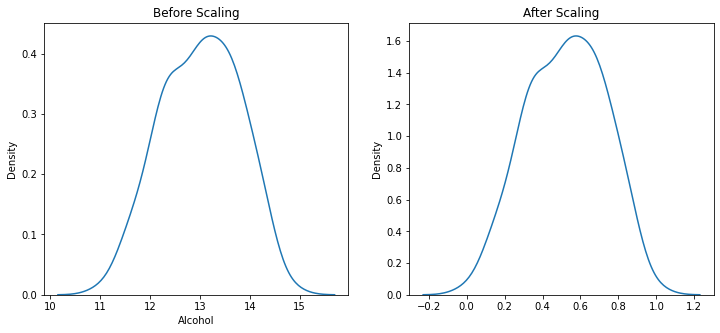

In [19]:
# Alcohol Column distribution

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(X_train.iloc[:,0])
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.kdeplot(X_train_scaled[:,0])
plt.title('After Scaling')

Text(0.5, 1.0, 'After Scaling')

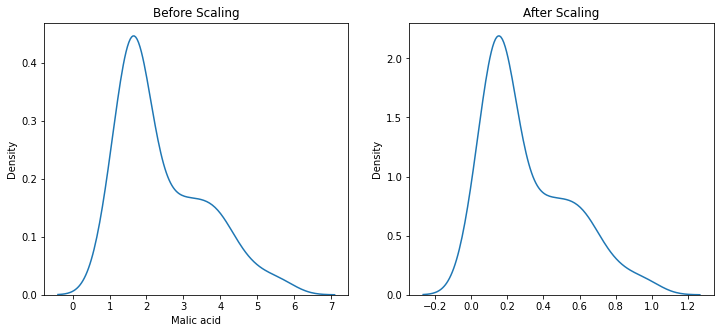

In [20]:
# Malic Acid column distribution

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(X_train.iloc[:,1])
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.kdeplot(X_train_scaled[:,1])
plt.title('After Scaling')

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [22]:
log = LogisticRegression()
log_scaled = LogisticRegression()

knn = KNeighborsClassifier()
knn_scaled = KNeighborsClassifier() 

In [23]:
log.fit(X_train,y_train)
log_scaled.fit(X_train_scaled,y_train)
knn.fit(X_train,y_train)
knn_scaled.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [24]:
# check for the accuracy score of logistic regression

print('score before scaling is',accuracy_score(y_test,y_pred=log.predict(X_test)))
print('score after scaling is',accuracy_score(y_test,y_pred=log_scaled.predict(X_test_scaled)))

score before scaling is 0.9444444444444444
score after scaling is 0.9166666666666666


In [25]:
# check the accuracy scores for knn

print('score before scaling is',accuracy_score(y_test,y_pred=knn.predict(X_test)))
print('score before scaling is',accuracy_score(y_test,y_pred=knn_scaled.predict(X_test_scaled)))

score before scaling is 0.9166666666666666
score before scaling is 0.9166666666666666


Here the accuracy is either reducing or has no effect because the scales of the columns is not so much different from each other.

In [26]:
df.columns

Index(['Class label', 'Alcohol', 'Malic acid'], dtype='object')

In [27]:
df = df.append(pd.DataFrame({'Class label':[1,2,1],'Alcohol':[67,89,98],'Malic acid':[67,54,66]}),ignore_index=True)

In [32]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
176,3,13.17,2.59
177,3,14.13,4.10
178,1,67.00,67.00
179,2,89.00,54.00


In [49]:
# make x and y

X = df.drop(columns=['Class label'])
y = df['Class label']

In [50]:
# Do train test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


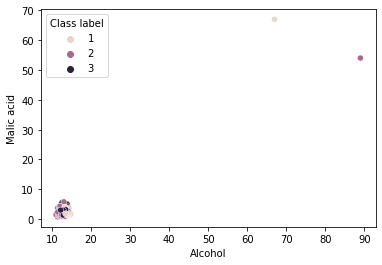

In [36]:
# plot the points on the graph

sns.scatterplot(X_train.iloc[:,0],X_train.iloc[:,1],hue=y_train)

In [37]:
# Do the scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'After Scaling')

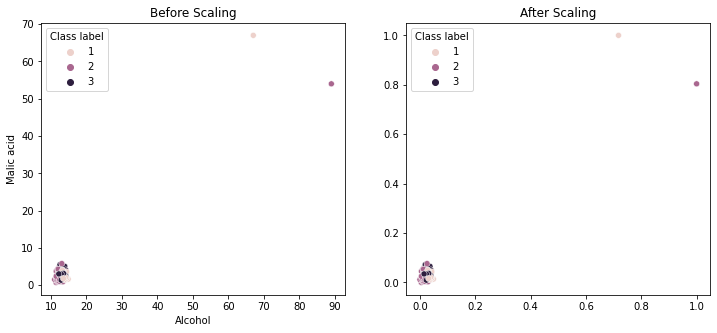

In [38]:
# plot the points on the graph
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(X_train.iloc[:,0],X_train.iloc[:,1],hue=y_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.scatterplot(X_train_scaled[:,0],X_train_scaled[:,1],hue=y_train)
plt.title('After Scaling')

In [39]:
display(X_train.describe().loc[['min','max']])
print('min of scaler',sc.data_min_)
print('max of scaler',sc.data_max_)
print('The min of scaled values is',(np.min(X_train_scaled,axis=0)))
print('the max of the scaled values is',np.max(X_train_scaled,axis=0))

,Alcohol,Malic acid
min,11.03,0.74
max,89.00,67.00


min of scaler [11.03  0.74]
max of scaler [89. 67.]
The min of scaled values is [0. 0.]
the max of the scaled values is [1. 1.]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


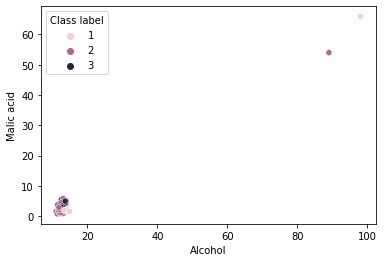

In [51]:
# plot the points on the graph

sns.scatterplot(X_train.iloc[:,0],X_train.iloc[:,1],hue=y_train)

In [52]:
# Do the scaling

from sklearn.preprocessing import RobustScaler
sc = RobustScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'After Scaling')

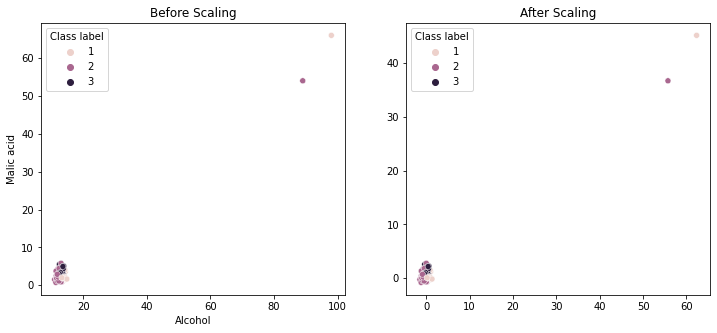

In [53]:
# plot the points on the graph
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(X_train.iloc[:,0],X_train.iloc[:,1],hue=y_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.scatterplot(X_train_scaled[:,0],X_train_scaled[:,1],hue=y_train)
plt.title('After Scaling')